# 最小値探索法の実装

In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv
import scipy.optimize as spo

## 降下法

In [ ]:
#Gradient descent
N = 100
A = np.ones((N,N))
for i in range(N):
    for j in range(i+1,N):
        A[i,j]=A[i,j]/2**(j-i)
for i in range(N):
    for j in range(i):
        A[i,j]=A[j,i]
b = np.arange(1,N+1)
print(A,b)
E=[]
x0 = b
r = b - A@x0
p = r
for k in range(10000):
    a = np.dot(p,r)/np.dot(p,A@p)
    x = x0 + a*p
    r = b - A@x
    p = r
    x0 = x
    #print(a,x,r)
    err = np.sqrt(np.dot(r,r))
    E.append(err)
    if(err<1e-7):
        print(k,x)
        break
plt.plot(E)
plt.show()
print(A@x)

## 共役勾配法

[[1.00000000e+00 2.50000000e-01 6.25000000e-02 1.56250000e-02
  3.90625000e-03 9.76562500e-04 2.44140625e-04 6.10351562e-05
  1.52587891e-05 3.81469727e-06 9.53674316e-07 2.38418579e-07
  5.96046448e-08 1.49011612e-08 3.72529030e-09 9.31322575e-10
  2.32830644e-10 5.82076609e-11 1.45519152e-11 3.63797881e-12]
 [2.50000000e-01 1.00000000e+00 2.50000000e-01 6.25000000e-02
  1.56250000e-02 3.90625000e-03 9.76562500e-04 2.44140625e-04
  6.10351562e-05 1.52587891e-05 3.81469727e-06 9.53674316e-07
  2.38418579e-07 5.96046448e-08 1.49011612e-08 3.72529030e-09
  9.31322575e-10 2.32830644e-10 5.82076609e-11 1.45519152e-11]
 [6.25000000e-02 2.50000000e-01 1.00000000e+00 2.50000000e-01
  6.25000000e-02 1.56250000e-02 3.90625000e-03 9.76562500e-04
  2.44140625e-04 6.10351562e-05 1.52587891e-05 3.81469727e-06
  9.53674316e-07 2.38418579e-07 5.96046448e-08 1.49011612e-08
  3.72529030e-09 9.31322575e-10 2.32830644e-10 5.82076609e-11]
 [1.56250000e-02 6.25000000e-02 2.50000000e-01 1.00000000e+00
  2.5

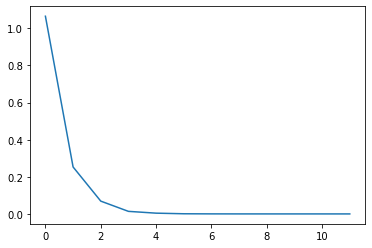

[ 3.32294922e-08  3.11145192e-08  2.19224994e-09 -2.94255891e-08
 -3.16895896e-08  2.41206521e-09  3.44425279e-08  1.29516824e-08
 -2.68196558e-08 -1.09143485e-08  2.90613187e-08 -3.34627508e-08
  3.00600007e-08 -3.79324661e-09 -8.07693468e-09 -7.82746490e-09
  5.19226973e-09  9.16450205e-09 -5.37660583e-10 -8.13334111e-09]


In [24]:
#Conjucate Gradient
N = 20
A = np.ones((N,N))
for i in range(N):
    for j in range(i+1,N):
        A[i,j]=A[i,j]/4**(j-i)
for i in range(N):
    for j in range(i):
        A[i,j]=A[j,i]
b = np.arange(N)
print(A,b)
E=[]
x0 = b
r0 = b - A@x0
p0 = r0
for k in range(10000):
    a = np.dot(p0,r0)/np.dot(p0,A@p0)
    x = x0 + a*p0
    r = r0 - a*A@p0
    err = np.sqrt(np.dot(r,r))
    #print(err)
    E.append(err)
    if(err<1e-7):
        print(k,x)
        break
    y = r-r0
    beta = -np.dot(r,y)/np.dot(p0,y)
    p = r + beta*p0
    
    x0 = x
    p0 = p
    r0 = r
plt.plot(E)
plt.show()
print(A@x-b)

## 一次元探索法
### 黄金分割法

In [ ]:
def f(x):
    return x**2-4*x+9

def golden_section():
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        #x1 = x0 - c1*G0@jacobi(x0)
        f1 = f(c1)
        #x2 = x0 - c2*G0@jacobi(x0)
        f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            print("end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        print(num,a,b,c1,c2,abs(b-a))
    return a

a = golden_section()
print(a)

### アルミホ法

In [ ]:
def almijo(d0,x0,df0,*args):
    alpha=0.0001
    beta=0.5
    f1 = J(x0,*args)
    dfd = df0@d0
    print(dfd)
    l = 0
    while l<100:
        tk = beta**l
        lim = alpha*tk*dfd
        x = x0 + tk*d0
        f2 = J(x,*args)
        print("f2-f1",f2-f1,"lim",lim)
        if(f2-f1<=lim):
            print("end",tk)
            break
        l+=1
    else:
        print("!!failed to converge in almijo!!",tk)
    return tk

## Himmelblau方程式を用いた準ニュートン法と共役勾配法の比較

[-0.83669297  6.39010026] [-29.26705572 298.0463814 ]
[[18436.89424833 18435.89424833]
 [18435.89424833 18436.89424833]]
[3.24125789 3.24111198] [932.26990698 613.39747396]
[[1.38834057e+08 1.38834056e+08]
 [1.38834056e+08 1.38834057e+08]]
[3604919.59021315 3604919.58474677] [1.87391213e+20 1.87391026e+20]
[[1.5005771e+36 1.5005771e+36]
 [1.5005771e+36 1.5005771e+36]]
[9.38361976e+51 9.38361976e+51] [3.30499796e+156 3.30499796e+156]
[[7.44594618e+245 7.44594618e+245]
 [7.44594618e+245 7.44594618e+245]]
[-inf -inf] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan na

<ipython-input-3-0342098bad28>:124: RuntimeWarning: overflow encountered in square
  if(np.sqrt(np.sum(jacobi(x)**2))<0.001):
<ipython-input-3-0342098bad28>:90: RuntimeWarning: overflow encountered in matmul
  x1 = x0 - c1*G0@jacobi(x0)
<ipython-input-3-0342098bad28>:93: RuntimeWarning: overflow encountered in matmul
  x2 = x0 - c2*G0@jacobi(x0)
<ipython-input-3-0342098bad28>:13: RuntimeWarning: invalid value encountered in double_scalars
  return (x**2+y-11)**2+(x+y**2-7)**2
<ipython-input-3-0342098bad28>:121: RuntimeWarning: overflow encountered in matmul
  x = x0 - alpha*G0@jacobi(x0)
<ipython-input-3-0342098bad28>:23: RuntimeWarning: invalid value encountered in double_scalars
  dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
<ipython-input-3-0342098bad28>:24: RuntimeWarning: invalid value encountered in double_scalars
  dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22


 [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]


[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

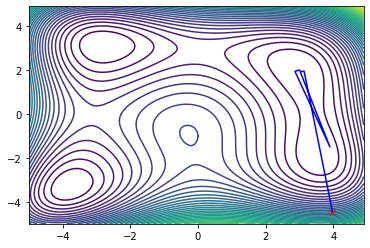

In [3]:
delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.01

def J(x,y):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x**2+y-11)**2+(x+y**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[J(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

def jacobi(x):
    dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
    dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22
    return np.array([dx,dy])

def golden_section(x0,d0):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 + c1*d0
        f1 = J(x1[0],x1[1])
        x2 = x0 + c2*d0
        f2 = J(x2[0],x2[1])
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a

def CG(start):
    result=[start]
    x0 = start
    d0 = -jacobi(x0)
    for k in range(10000):
        alpha = golden_section(x0,d0)
        x = x0 + alpha*d0
        result.append(x)
        d = jacobi(x)
        if(np.sqrt(np.sum(d**2))<0.001):
            print(k,"end")
            break
        p = -d + (np.dot(d.T,d)/np.dot(d0.T,d0))*d0
        x0 = x
        d0 = p
    return result

def golden_section_N(x0,G0):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 - c1*G0@jacobi(x0)
        f1 = J(x1[0],x1[1])
        #f1 = f(c1)
        x2 = x0 - c2*G0@jacobi(x0)
        f2 = J(x2[0],x2[1])
        #f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a  

def quasi_Newton(start):
    I=np.eye(2)
    G0=np.eye(2)
    x0 = start
    result=[start]
    for k in range(10000):
        alpha = golden_section_N(x0,G0)
        x = x0 - alpha*G0@jacobi(x0)
        
        result.append(x)
        if(np.sqrt(np.sum(jacobi(x)**2))<0.001):
            print(k,"end")
            break
        p0 = x - x0
        q0 = jacobi(x) - jacobi(x0)
        print(p0,q0)
        #p0 = p0.reshape(-1,1)
        #q0 = q0.reshape(-1,1)
        G = (I - p0@q0.T/q0.T@p0)@G0@(I - q0@p0.T/q0.T@p0) + p0@p0.T/q0.T@p0
        print(G)
        G0 = G
        x0 = x
        
    return result
        
start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

resultn=quasi_Newton(start)
resultc=CG(start)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

if(len(resultn)<1000):
    optX=[x[0] for x in resultn]
    optY=[x[1] for x in resultn]
    plt.plot(optX,optY,"-r");

optX=[x[0] for x in resultc]
optY=[x[1] for x in resultc]
plt.plot(optX,optY,"-b");

plt.show()

## OIと3DVarの比較実験

In [ ]:
#Optimal Interpolation
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B):
    h = 0.05
    F = 8.0
    a = 1.1
    
    Xf = Rungekutta4(Xa,h,F)
    #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    
    return Xf,Pf

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H2 @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
    
    A = B_inv + H3adj @ R_inv @ H3t
    
    #Xa = Xf + np.linalg.inv(B_inv + H2.T @ R_inv @ H2) @ H2.T @ R_inv @ d
    Xa = Xf + np.linalg.inv(A) @ H3adj @ R_inv @ d
    
    return Xa


t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data3.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data3.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#B = L*0.2
#print(Xa)
#print(B)
#X.append(Xa
    


for k in range(t):
    (Xf,Pf) = Forecast(Xa,B)
    Xa = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1 = []
C2 = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    Y1 = y[i]
    mask = Y1>=0
    Y1 = Y1[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    C1.append(rmse1)
    C2.append(rmse2)
plt.plot(C1,label="analysis")
plt.plot(C2,label="observation")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
#plt.savefig("KFrmse2.jpg")
plt.show()

In [22]:
def golden_section(x0,d0,*args):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 + c1*d0
        f1 = J(x1,*args)
        x2 = x0 + c2*d0
        f2 = J(x2,*args)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a

def CG(x0,*args):
    B_inv,H3t,R_inv,d = args
    #hes = la.inv(heinv)
    alpha0 = 1.0
    d0 = -jacobi(x0,*args)
    for k in range(1000):
        #alpha = golden_section(x0,d0,*args)
        dk = jacobi(x0,*args)
        xg = x0 + alpha0*d0
        dx = x0 - xg
        dg = jacobi(dx,*args)
        alpha = alpha0 * (dk.T@dx) / (dg.T@dx)
        print("step size = {}".format(alpha))
        x = x0 + alpha*d0
        d = jacobi(x,*args)
        nrm = np.sqrt(np.sum(d**2))
        #print("|d| = {}".format(nrm))
        if(nrm<1e-7):
            print(k,"end")
            jmin = J(x,*args)
            print("current cost function value = {}".format(jmin))
            break
        p = -d + (np.dot(d.T,d)/np.dot(d0.T,d0))*d0
        x0 = x
        d0 = p
        alpha0 = alpha
    jmin = J(x,*args)
    if(k==999):
        print("current cost function value(not converge) = {}".format(jmin))
    return x

In [23]:
#3dVar
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb


def J(x,*args):
    B_inv,H_t,R_inv,d = args
    return x.T@B_inv@x/2 + (H_t@x-d).T@R_inv@(H_t@x-d)/2

def jacobi(x,*args):
    B_inv,H_t,R_inv,d = args
    return B_inv@x + H_t.T@R_inv@(H_t@x-d)

def golden_section_N(x0,G0,B_inv,H_t,R_inv,d):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 - c1*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        f1 = J(x1,B_inv,H_t,R_inv,d)
        #f1 = f(c1)
        x2 = x0 - c2*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        f2 = J(x2,B_inv,H_t,R_inv,d)
        #f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a  

def quasi_Newton(start,B_inv,H_t,R_inv,d):
    I=np.eye(N)
    G0=np.eye(N)
    x0 = start
    result=[start]
    for k in range(10000):
        alpha = golden_section_N(x0,G0,B_inv,H_t,R_inv,d)
        x = x0 - alpha*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        
        result.append(x)
        grad = jacobi(x,B_inv,H_t,R_inv,d)
        if(np.sqrt(np.sum(grad**2)/N)<0.001):
            print(k,"end")
            break
        p0 = x - x0
        q0 = grad - jacobi(x0,B_inv,H_t,R_inv,d)
        print(p0,q0)
        #p0 = p0.reshape(-1,1)
        #q0 = q0.reshape(-1,1)
        G = (I - p0@q0.T/q0.T@p0)@G0@(I - q0@p0.T/q0.T@p0) + p0@p0.T/q0.T@p0
        print(G)
        G0 = G
        x0 = x
        
    return x

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B,y):
    h = 0.05
    F = 8.0
    a = 1.1
    
    X1 = Xa
    M = np.eye(N)
    #for i in range(5):
    Xf = Rungekutta4(X1,h,F)
        #M_ = get_linear(X1,h,F)
        #M = M_ @ M
    X1 = Xf
    
    #M = get_linear(Xa,h,F,N)
    #Pf = M @ Pa @ M.T #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    for i in range(N):
        if(y[i]<0):
            Pf[i,i]=0.5
        else:
            Pf[i,i]=0.2
    #print(Pf)
    return Xf,Pf

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H2 @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
   
    #A = B_inv + H2.T @ R_inv @ H2
    #b = H2.T @ R @ d
    #A = B_inv + H3adj @ R_inv @ H3t
    #b = H3adj @ R @ d
    args = (B_inv,H3t,R_inv,d)
    #X = CG(A,b)
    x0 = np.zeros(N)
    X = CG(x0,*args)
    #X = quasi_Newton(b,B_inv,H2,R_inv,d)
    Xa = X + Xf
    
    return Xa


t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data2.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#print(Xa)
#print(B)
#X.append(Xa
    

for k in range(t):
    #print(y[k])
    (Xf,Pf) = Forecast(Xa,B,y[k,:])
    Xa = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1_ = []
C2_ = []
C3_ = []
Cs = []
Cb = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    X4 = (X2-X1)*(X2-X1)/N
    Y1 = y[i]
    mask = Y1>=0
    mask_n = np.logical_not(mask)
    Y1 = Y1[mask]
    e = np.eye(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    mask1 = abs(X1)>1
    mask1_n = np.logical_not(mask1)
    #print(X1[mask1],X1[mask1_n],obsnum[i])
    X1sml = X1[mask_n]
    X1big = X1[mask]
    if(X1sml.shape[0]!=0):
        Xsml = sum((X1sml-X2[mask_n])*(X1sml-X2[mask_n]))/X1sml.shape[0]
    else:
        Xsml=0
    if(X1big.shape[0]!=0):
        Xbig = sum((X1big-X2[mask])*(X1big-X2[mask]))/X1big.shape[0]
    else:
        Xbig=0
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    rmse3 = np.sqrt(X4)
    rmses = np.sqrt(Xsml)
    rmseb = np.sqrt(Xbig)
    C1_.append(rmse1)
    C2_.append(rmse2)
    C3_.append(rmse3)
    Cs.append(rmses)
    Cb.append(rmseb)

ERR = np.array(C1_)
print(np.mean(ERR[200:]))
#plt.plot(C1,label="analysis,OI")
plt.plot(C2_,label="observation")
plt.plot(Cs,label="analysis,no obs")
plt.plot(Cb,label="analysis,otherwise")
plt.plot(C1_,label="analysis,3dVar")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
plt.savefig("3dVar_abs_obs2.jpg")
plt.show()
fname="3dVar_abs_rmse_contour.jpg"
print(fname)
Rmse = np.array(C3_).reshape(t,N)
X = np.array(X).reshape(t,N)
xs=np.arange(Rmse.shape[1])
time=np.arange(500)
plt.pcolor(xs,time,Rmse[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("RMSE")
plt.savefig(fname)
plt.show()
fname="3dVar_abs_ncontour.jpg"
print(fname)
plt.pcolor(xs,time,X[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("Xa")
plt.savefig(fname)
plt.show()

step size = 0.14285714285714285
step size = 0.01790281329923274
step size = 0.002191431634338457
step size = 0.00026757816894551695
step size = 3.266131140217083e-05
step size = 3.9865741667198736e-06
step size = 4.865909438988772e-07
step size = 5.93919993404218e-08
step size = 7.249229319929511e-09
step size = 8.8482162353807e-10
step size = 1.0799897066399582e-10
step size = 1.3182066704417694e-11
step size = 1.6089679515337542e-12
step size = 1.9638634268101622e-13
step size = 2.397039391297501e-14
step size = 2.9257624359166548e-15
step size = 3.5711077016499993e-16
step size = 4.3587989442445704e-17
step size = 5.3202338948134225e-18
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan


<ipython-input-22-a1b4657c0f15>:46: RuntimeWarning: invalid value encountered in double_scalars
  alpha = alpha0 * (dk.T@dx) / (dg.T@dx)


step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
current cost function value(not converge

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
current cost function value(not converge) = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
current cost function value(not converge) = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
current cost function value(not converge) = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step size = nan
step siz

KeyboardInterrupt: 

In [2]:
#3dVar
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def J(x,*args):
    xf,B_inv,mask,R_inv,d = args
    innv = H3_t(xf,x,mask) - d
    return (x.T@B_inv@x + innv.T@R_inv@innv)*0.5

def jacobi(x,*args):
    xf,B_inv,mask,R_inv,d = args
    innv = H3_t(xf,x,mask) - d
    djo = H3_adj(xf,R_inv@innv,mask)
    return B_inv@x + djo

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B,y):
    h = 0.05
    F = 8.0
    a = 1.1
    
    Xf = Rungekutta4(Xa,h,F)
        
    #M = get_linear(Xa,h,F,N)
    #Pf = M @ Pa @ M.T #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    #for i in range(N):
    #    if(y[i]<0):
    #        Pf[i,i]=0.5
    #    else:
    #        Pf[i,i]=0.2
    #print(Pf)
    return Xf,Pf

def Analysis(Xf,Pf,y,k):
    global zetak
    zetak = []
    H = np.eye(N)
    #H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
   
    X0 = np.zeros_like(Xf)
    args = (Xf,B_inv,mask,R_inv,d)
    if k==0:
        res = spo.minimize(J, X0, args=args, method="BFGS", jac=jacobi, options={'gtol':1e-8, 'disp':True},\
                       callback=callback)
        gcheck = np.zeros(len(zetak))
        for i in range(len(zetak)):
            gcheck[i] = spo.check_grad(J, jacobi, np.array(zetak[i]), *args)
        np.savetxt("gcheck_3dvar_abs.txt", gcheck)
    else:
        res = spo.minimize(J, X0, args=args, method="BFGS", jac=jacobi, options={'gtol':1e-8, 'disp':True})
    X = res.x
    #A = B_inv + H2.T @ R_inv @ H2
    #b = H2.T @ R @ d
    #A = B_inv + H3adj @ R_inv @ H3t
    #b = H3adj @ R @ d
    #X = CG(A,b)
    #X = quasi_Newton(b,B_inv,H2,R_inv,d)
    Xa = X + Xf
    
    return Xa

def callback(xk):
    global zetak
#    logger.debug("xk={}".format(xk))
    zetak.append(xk)

Optimization terminated successfully.
         Current function value: 183.412385
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
0
Optimization terminated successfully.
         Current function value: 116.880748
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 144.942122
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 79.126589
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 161.294286
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 139.502736
         Iterations: 2
         Function evaluations: 3
      

Optimization terminated successfully.
         Current function value: 46.959488
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 43.327615
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 59.096750
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 38.993786
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 27.782785
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 47.898583
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 13.354536
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 22.885992
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.732324
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.811965
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.417759
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.024648
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 13.688664
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 12.557207
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.250407
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.402707
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.119530
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.565288
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 24.465683
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.616051
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 23.038358
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.751642
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.031815
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 19.791367
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 20.995047
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 21.200009
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 28.094954
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.084653
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.279406
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.411885
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 46.462332
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 46.030252
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 38.273960
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 61.428480
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 43.804112
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 38.727488
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 14.952427
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.062013
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 26.844479
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.531765
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.744450
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.025915
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 33.574416
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.903627
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.928576
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.375505
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.639152
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.249522
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 65.109130
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 49.610428
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 61.660601
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 35.749875
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 40.678489
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 33.740740
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 84.677520
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 60.481807
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 89.732609
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 80.700469
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 61.390041
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 71.450515
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 58.987805
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 97.752201
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 65.291408
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 60.160881
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 62.026529
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 54.960553
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 15.543132
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.079731
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.754105
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.555271
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 36.951322
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 38.950954
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 30.595083
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 35.406467
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 48.854173
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 41.031384
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 36.021039
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 34.212781
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 66.842084
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 45.179327
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 50.801751
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 33.584185
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 46.526115
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.502031
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 18.870045
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 27.052478
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.478336
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 22.165905
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.444890
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.764431
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 18.253228
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.047960
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 22.555888
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.739253
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.752732
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 30.046217
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 48.147332
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 65.910712
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 63.040238
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 43.818330
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 69.291539
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 65.269334
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 49.525579
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 58.968232
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 60.462800
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 65.007539
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 65.862788
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 47.264077
         Iterations: 2
         Function evaluations: 3
         Grad

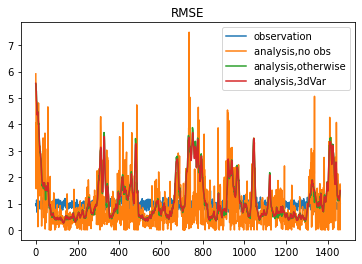

3dVar_abs_rmse_contour.jpg


<ipython-input-3-712ad5de650f>:103: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xs,time,Rmse[:500],cmap='RdBu_r')


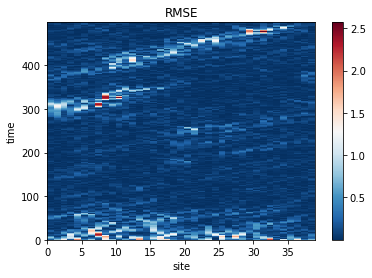

3dVar_abs_ncontour.jpg


<ipython-input-3-712ad5de650f>:112: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xs,time,X[:500],cmap='RdBu_r')


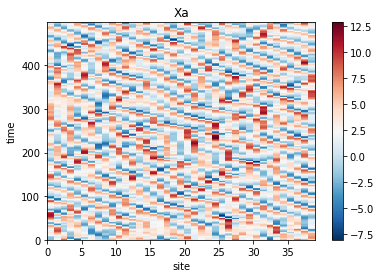

In [3]:
t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data2.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#print(Xa)
#print(B)
#X.append(Xa
    

for k in range(t):
    #print(y[k])
    (Xf,Pf) = Forecast(Xa,B,y[k,:])
    Xa = Analysis(Xf,Pf,y[k,:],k)
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1_ = []
C2_ = []
C3_ = []
Cs = []
Cb = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    X4 = (X2-X1)*(X2-X1)/N
    Y1 = y[i]
    mask = Y1>=0
    mask_n = np.logical_not(mask)
    Y1 = Y1[mask]
    e = np.eye(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    mask1 = abs(X1)>1
    mask1_n = np.logical_not(mask1)
    #print(X1[mask1],X1[mask1_n],obsnum[i])
    X1sml = X1[mask_n]
    X1big = X1[mask]
    if(X1sml.shape[0]!=0):
        Xsml = sum((X1sml-X2[mask_n])*(X1sml-X2[mask_n]))/X1sml.shape[0]
    else:
        Xsml=0
    if(X1big.shape[0]!=0):
        Xbig = sum((X1big-X2[mask])*(X1big-X2[mask]))/X1big.shape[0]
    else:
        Xbig=0
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    rmse3 = np.sqrt(X4)
    rmses = np.sqrt(Xsml)
    rmseb = np.sqrt(Xbig)
    C1_.append(rmse1)
    C2_.append(rmse2)
    C3_.append(rmse3)
    Cs.append(rmses)
    Cb.append(rmseb)

ERR = np.array(C1_)
print(np.mean(ERR[200:]))
#plt.plot(C1,label="analysis,OI")
plt.plot(C2_,label="observation")
plt.plot(Cs,label="analysis,no obs")
plt.plot(Cb,label="analysis,otherwise")
plt.plot(C1_,label="analysis,3dVar")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
#plt.savefig("3dVar_abs_obs2.jpg")
plt.show()
fname="3dVar_abs_rmse_contour.jpg"
print(fname)
Rmse = np.array(C3_).reshape(t,N)
X = np.array(X).reshape(t,N)
xs=np.arange(Rmse.shape[1])
time=np.arange(500)
plt.pcolor(xs,time,Rmse[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("RMSE")
#plt.savefig(fname)
plt.show()
fname="3dVar_abs_ncontour.jpg"
print(fname)
plt.pcolor(xs,time,X[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("Xa")
#plt.savefig(fname)
plt.show()